In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
def Ri_Number(datapath, case_id, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,40), Yp1=range(35,40))
    #Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    #grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    #Uzt = u_ymean[:,:,xidx] # U in z, t dimensions
    Utz = u_ymean[:,:,xidx]
    
    # Potential temp
    Ttz = state.Temp.data[:,:,:,xidx].mean(2) # Temp
    
    depth = state.Z.data
    time = state.T.data / 86400 # Time in days
    
    Uz = np.gradient(Utz, depth, axis=1)
    Uz2 = Uz**2
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Stz = state.S.data[:,:,:,xidx].mean(2)
    p = np.tile(pres,[len(time),1])
    Rho = gsw.rho(Stz, Ttz, p)
    
    N2, Pmid = gsw.Nsquared(Stz,Ttz,pres,55,axis=1)
    
    Ri = N2 / Uz2[:,:-1]
    
    return depth, time, N2, Rho, Ri

In [ ]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
#caseN = 1
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

depth, time, N1, Uz1, Ri1 = Ri_Number(path1, 1, gf)
depth, time, N2, Uz2, Ri2 = Ri_Number(path1, 2, gf)
depth, time, N3, Uz3, Ri3 = Ri_Number(path1, 3, gf)
depth, time, N4, Uz4, Ri4 = Ri_Number(path1, 4, gf)
depth, time, N5, Uz5, Ri5 = Ri_Number(path1, 5, gf)

In [ ]:
Ri1[80,:].min()

In [ ]:
# Making plot for Ri number
fig1 = plt.figure(figsize=(10,5))
fig1.tight_layout()  

cRi = np.linspace(0,5,20) # Contour range for U
#crho = np.linspace(10,25,15) # Contour range for density
cmap = 'YlGnBu_r'


ax1 = fig1.add_subplot(211)
im1 = ax1.contourf(time, depth[:-1], Ri1.T, cRi, cmap=cmap, extend='max')
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Plot isopycnals
#CS1 = ax1.contour(time, depth, Rho1-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes = fig1.add_axes([0.72, 0.93, 0.15, 0.01])
cbar = fig1.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([0, 1, 2, 3, 4, 5])
cbar.ax.set_title('Ri', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[-1],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) $4N_0^2$', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig1.add_subplot(212)
im2 = ax2.contourf(time, depth[:-1], Ri4.T, cRi, cmap=cmap, extend='max')
#ax2.axhline(y=depth[8],color='k',linestyle='--')
#CS2 = ax2.contour(time, depth, Rho2-1000, crho, colors='k', linewidths=.5)
#plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)


ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[-1],depth[0])
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) $1N_0^2$', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)
ax2.set_xlabel('Time [days]', size=15)

In [ ]:
np.where(Ri1==Ri1.min())

In [3]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_nosill'
#caseN = 1
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

depth, time, N1, Rho1, Ri1 = Ri_Number(path1, 4, gf)
depth, time, N2, Rho2, Ri2 = Ri_Number(path2, 4, gf)

/home/1959/local/bin/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


In [ ]:
N1.max(), N1.min(), N2.max(), N2.min()

Text(0.5, 0, 'Time [days]')

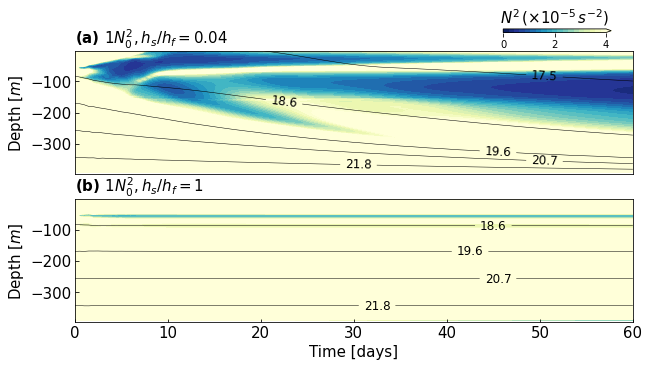

In [5]:
# Making plot for buoyancy freq Nsquare
fig2 = plt.figure(figsize=(10,5))
fig2.tight_layout()  

cN = np.linspace(0,4,20) # Contour range for U
crho = np.linspace(10,25,15) # Contour range for density
cmap = 'YlGnBu_r'


ax1 = fig2.add_subplot(211)
im1 = ax1.contourf(time, depth[:-1], N1.T*1e5, cN, cmap=cmap, extend='max')
#ax1.axhline(y=depth[8],color='k',linestyle='--')

# Plot isopycnals
CS1 = ax1.contour(time, depth, Rho1.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

cbaxes = fig2.add_axes([0.72, 0.93, 0.15, 0.01])
cbar = fig2.colorbar(im1,cax=cbaxes, orientation='horizontal')
cbar.set_ticks([0, 2, 4])
cbar.ax.set_title(r'$N^2\,(\times 10^{-5}\,s^{-2})$', size=15)

ax1.set_xlim(time[0],time[-1])
ax1.set_ylim(depth[-1],depth[0])
ax1.xaxis.set_visible(False)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) $1N_0^2, h_s/h_f=0.04$', loc='left', size=15, weight='bold')
ax1.set_ylabel('Depth [$m$]', size=15)



ax2 = fig2.add_subplot(212)
im2 = ax2.contourf(time, depth[:-1], N2.T*1e5, cN, cmap=cmap, extend='max')
#ax2.axhline(y=depth[8],color='k',linestyle='--')
CS2 = ax2.contour(time, depth, Rho2.T-1000, crho, colors='k', linewidths=.5)
plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)


ax2.set_xlim(time[0],time[-1])
ax2.set_ylim(depth[-1],depth[0])
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) $1N_0^2, h_s/h_f=1$', loc='left', size=15, weight='bold')
ax2.set_ylabel('Depth [$m$]', size=15)
ax2.set_xlabel('Time [days]', size=15)

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig4.savefig(fig_path + '/4Sz-minhs_UT_d01.png', dpi=300, bbox_inches='tight')
#fig1.savefig(fig_path + '/RiNumber.png', dpi=300, bbox_inches='tight')
fig2.savefig(fig_path + '/N2_transition.png', dpi=300, bbox_inches='tight') 